# Week 7
# Analyzing Home Prices 

The [Ames Housing Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) was introduced by Professor Dean De Cock in 2011 for use in data science education. It contains 2,919 observations of housing sales in Ames, Iowa between 2006 and 2010. There are a total of 79 features describing each house's size, quality, area, age, and other miscellaneous attributes. 

From Kaggle:

>Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

## 1. Overall Understanding of the Data

- Load the dataset as a pandas data frame.
- Display key information of the data.
- Handle missing values.

1.1 In the cell below, import the `pandas` library and load file `train.csv` from the Ames housing dataset as a data frame.

In [1]:
import pandas as pd
data = pd.read_csv("data/train.csv")

1.2 Display the first 5 rows of the data frame.

In [2]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1.3 Display the shape of the data frame and list all column names.

In [3]:
print("Shape:", data.shape)
print("Column names:")
print(data.columns)

Shape: (1460, 81)
Column names:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',


1.4 Display the number of missing values in each column.

In [4]:
result = data.isna().sum()

for index in result.index:
    if result[index] != 0:
        print("%15s: %d" % (index, result[index]))

    LotFrontage: 259
          Alley: 1369
     MasVnrType: 8
     MasVnrArea: 8
       BsmtQual: 37
       BsmtCond: 37
   BsmtExposure: 38
   BsmtFinType1: 37
   BsmtFinType2: 38
     Electrical: 1
    FireplaceQu: 690
     GarageType: 81
    GarageYrBlt: 81
   GarageFinish: 81
     GarageQual: 81
     GarageCond: 81
         PoolQC: 1453
          Fence: 1179
    MiscFeature: 1406


1.5 Remove all the columns that contain missing values.

In [5]:
# Create a list of column names that contain missing values
missingness = data.isna().sum()
columns_with_missing_values = []
for name in missingness.index:
    if missingness[name] > 0:
        columns_with_missing_values.append(name)
print(columns_with_missing_values)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [6]:
# Drop all the columns in the list
data = data.drop(columns_with_missing_values, axis=1)
data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

## 2. Study Key Features

The total number of features seems overwhelming, so let's start with a few features that we know are definitely relevant:
1. `OverallQual`: Overall material and finish quality
2. `YearBuilt`: Original construction date
3. `TotalBsmtSF`: Total basement area in square feet
4. `GrLivArea`: Above ground living area in square feet

and don't forget `SalePrice`.

For each of these 5 features, please find:
- Descriptive statistics
- Graphical representation of their distribution
- Check for outliers
- Study correlations

2.1 **Descriptive statistics**: For each of the 5 features, find its minimum, maximum, mean, and standard deviation.

In [9]:
useful_features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
data[useful_features].max() # use max(), min(), mean(), or std() for a specific statistic

OverallQual        10
YearBuilt        2010
TotalBsmtSF      6110
GrLivArea        5642
SalePrice      755000
dtype: int64

In [10]:
data[useful_features].describe() # Obtain all useful statistics

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1057.429452,1515.463699,180921.195890
std,1.382997,30.202904,438.705324,525.480383,79442.502883
min,1.000000,1872.000000,0.000000,334.000000,34900.000000
25%,5.000000,1954.000000,795.750000,1129.500000,129975.000000
50%,6.000000,1973.000000,991.500000,1464.000000,163000.000000
75%,7.000000,2000.000000,1298.250000,1776.750000,214000.000000
max,10.000000,2010.000000,6110.000000,5642.000000,755000.000000


2.2 **Distribution**: For each of the 5 features, generate a histogram. Choose the number of bins properly.

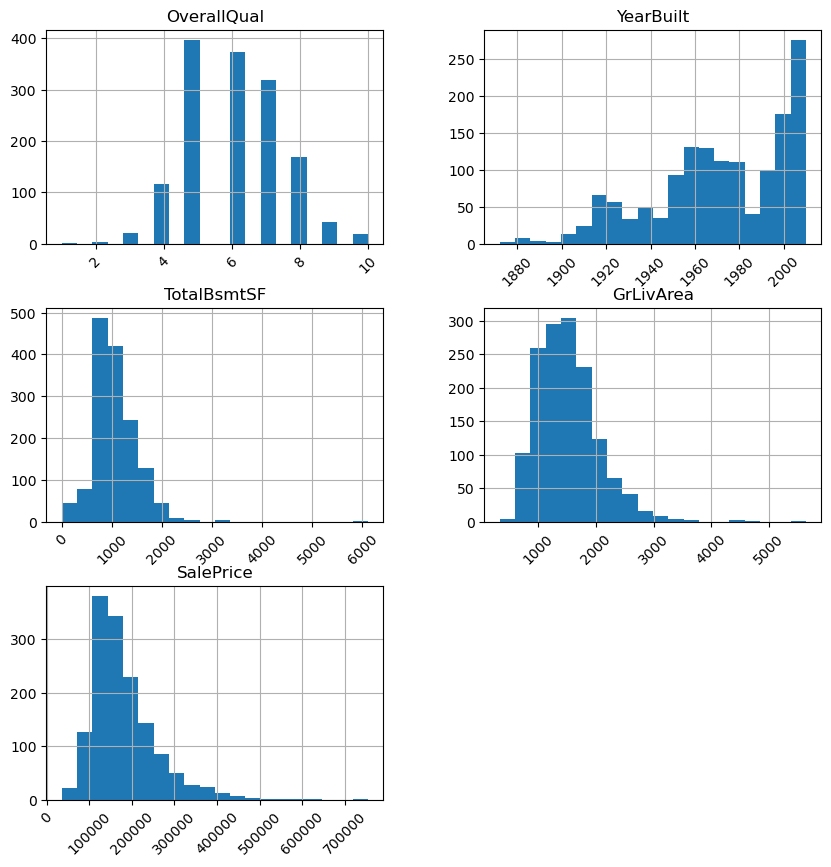

In [11]:
# Create a histogram for SalePrice
import matplotlib.pyplot as plt
data[useful_features].hist(bins=20, figsize=(10, 10), xrot=45)
plt.show() # This statement will remove the display of intermediate results

2.3 **Outliers**: An **outlier** is a value that is located far away from the vast majority of the data. Remove those rows that contain outliers.

<AxesSubplot:>

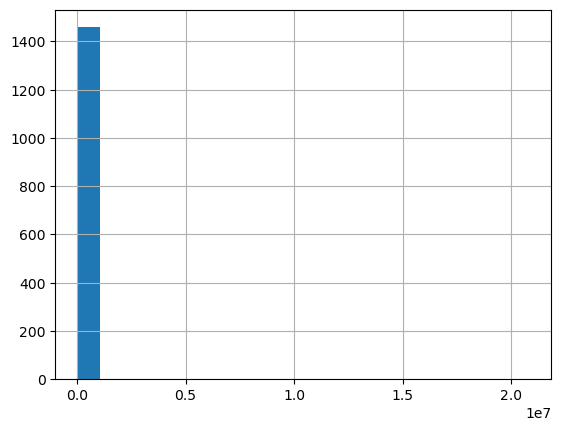

In [12]:
# Let me add an outlier in the dataset and show how differently the histogram looks
temp = data.copy()
temp.loc[0, 'SalePrice'] = 20805000
temp['SalePrice'].hist(bins=20) # The data are clustered into a very small
# number of bins, which is typical for a dataset with outliers.

2.4 **Correlation with sale price**: For each of the 4 chosen predictive features, draw a scatter plot of this feature and `SalePrice`. Set the title, axis label of the graph properly.

Text(0, 0.5, 'Sale Price')

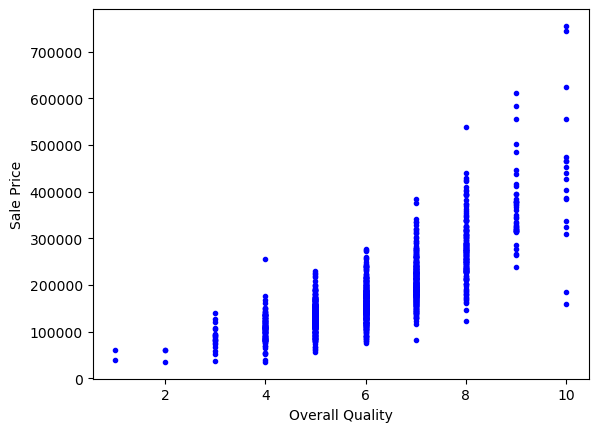

In [13]:
# Draw a scatter plot between the quality and the sale price
plt.plot(data['OverallQual'], data['SalePrice'], "b.")
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price') 
# The graph shows a weak increasing trend

In [14]:
def create_scatter_plot(x_feature, data):
    plt.plot(data[x_feature], data['SalePrice'], "b.")
    plt.xlabel(x_feature)
    plt.ylabel('Sale Price')

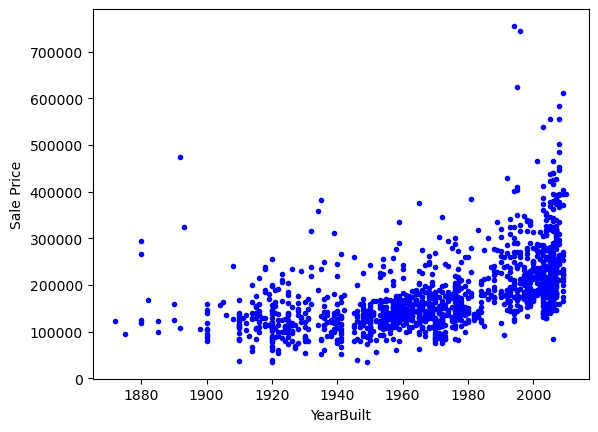

In [19]:
create_scatter_plot("YearBuilt", data) # A weak increasing trend

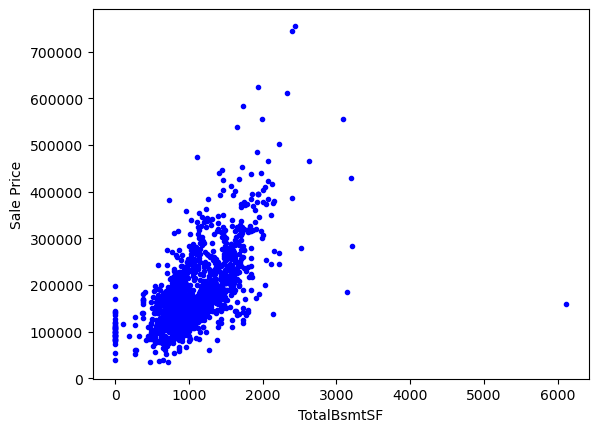

In [16]:
create_scatter_plot("TotalBsmtSF", data)
# There is an outlier with 6000+ basement area and 200k sale price

In [26]:
# Examine the outlier to see if it is a mistake.
# Use TotalBsmtSF > 5000 as the condition to extract the outlier

# The unusually large basement seems to make sense as we see that there are
# two full bathrooms in the basement, and the above-ground area is also very large.
# It could be that the house is sold with an unusually low price.
# Even thought the record doesn't have a mistake, it should be excluded from 
# the study of the general trend.
outlier = data[data['TotalBsmtSF'] > 5000]
for col in outlier.columns:
    print("%15s:" % col, outlier.loc[1298, col])

             Id: 1299
     MSSubClass: 60
       MSZoning: RL
        LotArea: 63887
         Street: Pave
       LotShape: IR3
    LandContour: Bnk
      Utilities: AllPub
      LotConfig: Corner
      LandSlope: Gtl
   Neighborhood: Edwards
     Condition1: Feedr
     Condition2: Norm
       BldgType: 1Fam
     HouseStyle: 2Story
    OverallQual: 10
    OverallCond: 5
      YearBuilt: 2008
   YearRemodAdd: 2008
      RoofStyle: Hip
       RoofMatl: ClyTile
    Exterior1st: Stucco
    Exterior2nd: Stucco
      ExterQual: Ex
      ExterCond: TA
     Foundation: PConc
     BsmtFinSF1: 5644
     BsmtFinSF2: 0
      BsmtUnfSF: 466
    TotalBsmtSF: 6110
        Heating: GasA
      HeatingQC: Ex
     CentralAir: Y
       1stFlrSF: 4692
       2ndFlrSF: 950
   LowQualFinSF: 0
      GrLivArea: 5642
   BsmtFullBath: 2
   BsmtHalfBath: 0
       FullBath: 2
       HalfBath: 1
   BedroomAbvGr: 3
   KitchenAbvGr: 1
    KitchenQual: Ex
   TotRmsAbvGrd: 12
     Functional: Typ
     Fireplaces: 3
   

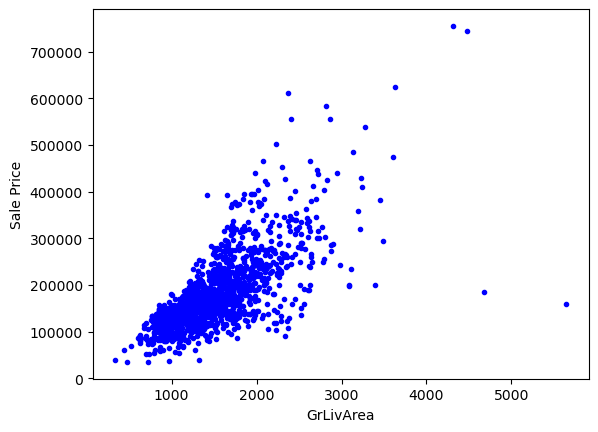

In [18]:
create_scatter_plot("GrLivArea", data)
# There are two outliers

Describe the correlation between each predictive feature and `SalePrice`. Is there a positive correclation, a negative correlation, or no correlation?

In [30]:
# Study the two outliers in the above plot.
outliers = data[(data['GrLivArea'] > 4000) & (data['SalePrice'] < 300000)]
# outliers

# Let's look at row 523 and see if there is a mistake
# Conclusion: nothing looks wrong. It may just be another great deal.
for col in outliers.columns:
    print("%15s:" % col, outliers.loc[523, col])

             Id: 524
     MSSubClass: 60
       MSZoning: RL
        LotArea: 40094
         Street: Pave
       LotShape: IR1
    LandContour: Bnk
      Utilities: AllPub
      LotConfig: Inside
      LandSlope: Gtl
   Neighborhood: Edwards
     Condition1: PosN
     Condition2: PosN
       BldgType: 1Fam
     HouseStyle: 2Story
    OverallQual: 10
    OverallCond: 5
      YearBuilt: 2007
   YearRemodAdd: 2008
      RoofStyle: Hip
       RoofMatl: CompShg
    Exterior1st: CemntBd
    Exterior2nd: CmentBd
      ExterQual: Ex
      ExterCond: TA
     Foundation: PConc
     BsmtFinSF1: 2260
     BsmtFinSF2: 0
      BsmtUnfSF: 878
    TotalBsmtSF: 3138
        Heating: GasA
      HeatingQC: Ex
     CentralAir: Y
       1stFlrSF: 3138
       2ndFlrSF: 1538
   LowQualFinSF: 0
      GrLivArea: 4676
   BsmtFullBath: 1
   BsmtHalfBath: 0
       FullBath: 3
       HalfBath: 1
   BedroomAbvGr: 3
   KitchenAbvGr: 1
    KitchenQual: Ex
   TotRmsAbvGrd: 11
     Functional: Typ
     Fireplaces: 1
  

## 3. Identify Additional Predictive Feature
Let’s find out if other features are helpful to the price prediction. Additional features can be identified in the following ways:
- Calculate correlation coefficient between `SalePrice` and an existing feature.
- Create new features from existing features.

3.1 Calculate the correlation coefficient of each feature with `SalePrice` (excluding `SalePrice` itself). Identify the feature (other than the 4 features studied in the previous section) that has the strongest correlation with the sale prices.

In [37]:
# Besides the features that have been selected, "GarageCars" and "FullBath" have
# the highest correlation with "SalePrice"
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
TotalArea        0.778959
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
AreaPerRoom      0.540645
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

3.2 **Feature engineering**: Based on our experience, the total area of the house and the average area per room should also be important factors in determining the price. Please create these two columns using the following formula:

1. total area = total area above ground (“GrLivArea”) + total basement area (“TotalBsmtSF”)
2. area per room = total area above ground (“GrLivArea”) / number of rooms (“TotRmsAbvGrd”).


In [36]:
data['TotalArea'] = data['GrLivArea'] + data['TotalBsmtSF']
data['AreaPerRoom'] = data['GrLivArea'] / data['TotRmsAbvGrd']
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,AreaPerRoom
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,2566,213.750000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,2524,210.333333
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,2706,297.666667
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,2473,245.285714
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,3343,244.222222


Up to this point, you should have obtained 8 features that are helpful to predict the sale price: `OverallQual`, `YearBuilt`, `TotalBsmtSF`, `GrLivArea`, `TotalArea`, `AreaPerRoom`, and 2 features selected in 3.1. Create a new data frame with `SalePrice` and these 8 features only. Save the data as a CSV file named `HousingData_processed.csv` on your computer.

In [39]:
selected_columns = ["OverallQual", "YearBuilt", "TotalBsmtSF", "GrLivArea",
                    "GarageCars", "FullBath", "TotalArea", "AreaPerRoom",
                    "SalePrice"]
data[selected_columns].head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,FullBath,TotalArea,AreaPerRoom,SalePrice
0,7,2003,856,1710,2,2,2566,213.750000,208500
1,6,1976,1262,1262,2,2,2524,210.333333,181500
2,7,2001,920,1786,2,2,2706,297.666667,223500
3,7,1915,756,1717,3,1,2473,245.285714,140000
4,8,2000,1145,2198,3,2,3343,244.222222,250000


In [42]:
# Remove Row 523 and 1298 from the dataset.
data.drop([523, 1298], inplace=True)

In [45]:
data[selected_columns].to_csv("data/HousingData_processed.csv", index=False)

In [46]:
# Load the data from this file, and confirm that Row 523 and 1298 are removed
new_data = pd.read_csv("data/HousingData_processed.csv")
new_data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,FullBath,TotalArea,AreaPerRoom,SalePrice
0,7,2003,856,1710,2,2,2566,213.750000,208500
1,6,1976,1262,1262,2,2,2524,210.333333,181500
2,7,2001,920,1786,2,2,2706,297.666667,223500
3,7,1915,756,1717,3,1,2473,245.285714,140000
4,8,2000,1145,2198,3,2,3343,244.222222,250000


In [49]:
data.loc[1298, :] # There is an error because the row has been removed.

Id                     1300
MSSubClass               20
MSZoning                 RL
LotArea                7500
Street                 Pave
                    ...    
SaleType                 WD
SaleCondition        Normal
SalePrice            154000
TotalArea              2492
AreaPerRoom      207.666667
Name: 1299, Length: 64, dtype: object